In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats
from math import exp
import processes.foundation as fd
import processes.fitModel as fM
import processes.histogramAction as hA
from math import exp, sqrt, pi, erfc
from lmfit import Model

In [ ]:
run_list = [x for x in range(3490,3499)]

In [35]:
t2_data = fd.get_df_multiple(run_list, 'Card1')

In [36]:
groups = t2_data.groupby("channel")
Ge_data = groups.get_group(11)

In [41]:
t1_data = fd.get_t1_data(3495, 'Card1')

(0.0, 600.0)

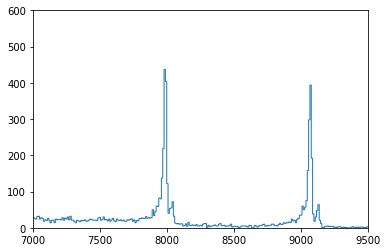

In [38]:
plt.hist(Ge_data["trapEmax"], histtype ='step', bins=3000)
plt.xlim(7000,9500)
plt.ylim(0,600)

In [49]:
peaks = [[7500,8500],[8500,9500]]
peak1_min, peak1_max = 7500,8500
peak2_min, peak2_max = 8500, 9500
energy = [1172, 1333]

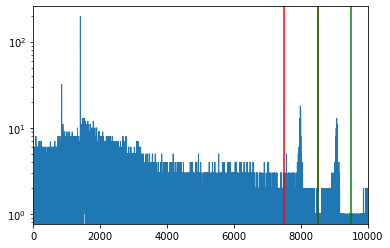

[7984.0757, 9068.322]


In [59]:
counts, bins, bars = plt.hist(Ge_data["trapEmax"], histtype='step', bins=160000)
adc = []
for ranges in peaks:
    peak_range = hA.find_nearest_bin(bins, ranges[0]), hA.find_nearest_bin(bins, ranges[1])
    peak_idx = np.argmax(counts[peak_range[0]:peak_range[1]]) + peak_range[0]
    peak = bins[peak_idx]
    adc.append(peak)

plt.yscale('log')
plt.xlim(0, 10000)

plt.axvline(x=peak1_min, color='r')
plt.axvline(x=peak1_max, color='r')
plt.axvline(x=peak2_min, color='green')
plt.axvline(x=peak2_max, color='g')
plt.show()
print(adc)

In [60]:
bins

array([-3042.5647, -3042.3792, -3042.1934, ..., 26662.453 , 26662.639 ,
       26662.824 ], dtype=float32)

In [61]:
slope, intercept, r_value, p_value, std_err = stats.linregress(adc,energy)
print(slope)
print(intercept)

0.1484902075488947
-13.557091595411293


In [62]:
energy = [x*slope + intercept for x in Ge_data["trapEmax"]]

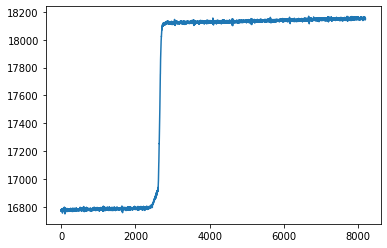

In [11]:
plt.plot(t1_data[0]['waveform']["values"].nda[1])

In [63]:
baseline = [x*slope + intercept for x in t1_data[0]['waveform']["values"].nda[1][0:500]]

In [64]:
baseline_Average = baseline - np.mean(baseline)

In [67]:
rms = np.sqrt(np.mean(baseline_Average**2))

In [68]:
rms

0.8154394334382299

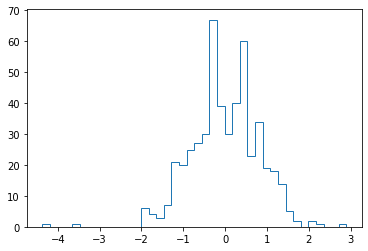

In [70]:
plt.hist(baseline_Average, histtype="step", bins=40)
plt.show()